In [1]:
import matplotlib.pyplot as plt
import seaborn as snn
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('test_energy_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [4]:
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [5]:
df['Building Type'].nunique()

3

In [6]:
df['Day of Week'].nunique()

2

<Axes: >

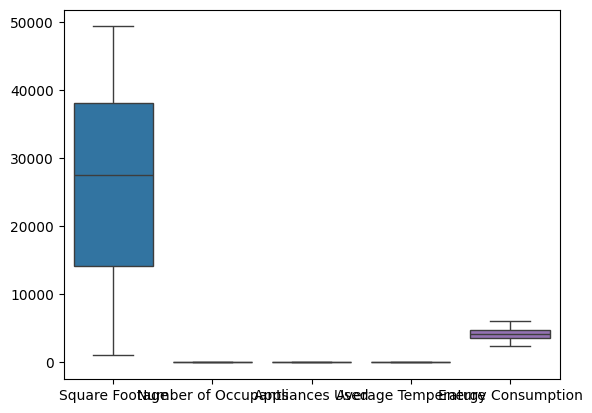

In [7]:
snn.boxplot(df)

In [8]:
X = df.drop('Energy Consumption',axis=1)
y = df['Energy Consumption']

In [9]:
num_cols = X.select_dtypes(include='number').columns
obj_cols = X.select_dtypes(exclude='number').columns

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=25)

In [11]:
df.corr(numeric_only=True)['Energy Consumption']

Square Footage         0.724039
Number of Occupants    0.308594
Appliances Used        0.176380
Average Temperature   -0.079733
Energy Consumption     1.000000
Name: Energy Consumption, dtype: float64

In [12]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False)

In [13]:
def returnsnumcol_train(train):
    val = encoder.fit_transform(train[obj_cols])
    encoded = pd.DataFrame(val,columns=encoder.get_feature_names_out())
    num_cols_ = train[num_cols].reset_index(drop=True)
    return pd.concat([encoded,num_cols_],axis=1)
def returnsnumcol_test(test):
    val = encoder.fit_transform(test[obj_cols])
    encoded = pd.DataFrame(val,columns=encoder.get_feature_names_out())
    num_cols_ = test[num_cols].reset_index(drop=True)
    return pd.concat([encoded,num_cols_],axis=1)

In [14]:
xtrain = returnsnumcol_train(xtrain)
xtest = returnsnumcol_test(xtest)

In [15]:
obj_cols

Index(['Building Type', 'Day of Week'], dtype='object')

In [16]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [17]:
model.score(xtrain,ytrain)

0.9999999997242909

In [18]:
model.score(xtest,ytest)

0.9999999997330661